# 2020-1 Distributed Machine Learning
## 수강능력시험

1. 정답은 마크다운으로 작성, 화요일 23시 59분까지 분산머신러닝처리 repository에 pull request 할 수 있도록 합니다.(Answer_Q1_학번(사번).md)
2. 인터넷을 찾아보지 않고, 최대한 자기 실력으로 문제를 풀어 주시기 바랍니다
3. To be Honest!

### Q1. 다음 코드를 작동할 수 있도록 고치시오
 - Hint : Text Mining의 데이터 분석 프로세스

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

categories = [
    'alt.atheism',
    'talk.religion.misc',
]
data = fetch_20newsgroups(subset='train', categories=categories)

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

grid_search.fit(data.data, data.target)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   23.8s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__max_df': (0.5, 0.75, 1.0), 'vect__ngram_range': ((1, 1), (1, 2)), 'clf__max_iter': (20,), 'clf__alpha': (1e-05, 1e-06), 'clf__penalty': ('l2', 'elasticnet')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

### Q2. 신민철은 최근에 SVM을 이용하여 붓꽃 분류 모델을 작성 후 공유하였다. 완성된 머신 러닝 모델을 불러와서 시험해보세요
- smc_iris_model.joblib 파일을 불러와서 iris data에서 predict를 진행해보세요.
- iris 데이터를 다운로드 받는 코드
> from sklearn import datasets<br>
X, y = datasets.load_iris(return_X_y=True)

In [1]:
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn.externals import joblib


X,y = datasets.load_iris(return_X_y=True)

file= 'smc_iris_model.joblib'
model = joblib.load(file)
model.predict(X)

C:\Users\IMPlay\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)


### Q3. 신민철은 영화 박스오피스 데이터를 수집하기 위해, 영화진흥위원회 OPENAPI를 이용하여 데이터를 수령하기로 하였습니다. 제공되는 설명을 읽고 API 에서 2019년 12월 1일부터 12월 31일까지의 박스오피스 데이터를 받아 데이터프레임 형태로 수집하세요

* 주소 : http://www.kobis.or.kr/kobisopenapi/homepg/apiservice/searchServiceInfo.do?serviceId=searchMovieList
(가입이 필요합니다)

* 요청 시 주의할 파라미터: repNationCd = 'K'(한국 영화만 조회하세요)

* 완성된 데이터프레임의 header : movieNm(영화이름), showRange(박스오피스 조회 일자), salesAmt(해당 일의 매출액), audiCnt(일일 관객 수), scrnCnt(스크린 수)

In [31]:
import pandas as pd
import requests
import datetime

def crawl_Kmovie(keys, start, end):
    url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json'
    to_find_headers =  ['movieNm', 'showRange', 'salesAmt', 'audiCnt', 'scrnCnt']
    Kmovie_headers = []
    Kmovie_info = []
    
    for date in pd.date_range(start, end):
        payload = {'key': keys, 
                   'targetDt': date.strftime('%Y%m%d'),
                   'repNationCd': 'K'
                  }
        res = requests.get(url, params = payload)
        res.encoding = 'utf-8'
        for movie in res.json()['boxOfficeResult']['dailyBoxOfficeList'] :
            Kmovie_headers = []
            tmp_info = []
    
            Kmovie_headers.append('date')
            tmp_info.append(date)
            
            for header, info in movie.items() :
                if header in to_find_headers:
                    Kmovie_headers.append(header)
                    tmp_info.append(info)
                    
            Kmovie_info.append(tmp_info)
            
    return pd.DataFrame(Kmovie_info, columns = Kmovie_headers)
            
Kmovie_data = crawl_Kmovie(keys='541ac79d22249396c07bb507e00fbabc',start='20191201',end='20191231')
print(Kmovie_data)

          date                  movieNm    salesAmt audiCnt scrnCnt
0   2019-12-01                   나를 찾아줘   930737920  105781     781
1   2019-12-01                     블랙머니   708640460   81335     721
2   2019-12-01              신의 한 수: 귀수편    37039580    4223     107
3   2019-12-01                 82년생 김지영    35917580    4111     117
4   2019-12-01                     윤희에게    31966100    3790      71
5   2019-12-01                      카센타    16619020    2026     121
6   2019-12-01                 웃는남자 감독판    15910500    1223      18
7   2019-12-01                    집 이야기     6174880     744      61
8   2019-12-01                 대통령의 7시간     3835220     490      15
9   2019-12-01              행동하는 양심 김대중     3210500     376      84
10  2019-12-02                   나를 찾아줘   342408700   43975     749
11  2019-12-02                     블랙머니   272177800   34702     739
12  2019-12-02              신의 한 수: 귀수편    19390780    2610     145
13  2019-12-02                 82년생 김지영    19944

### Q4. 파이썬에서 모듈과 클래스의 차이는 무엇인가요? 한 마디로 설명해 주세요.

클래스는 큰 틀이다. 모듈은 클래스뿐만 아니라 변수, 메서드를 모아둔 파일이다.

### Q5. AWS EC2, Google Cloud Compute Engine, MS Azure VMs 중 한 곳에 자신의 컴퓨팅 노드를 만들고, 쉘에 접속한 사진을 찍어서 같이 업로드해주세요.
**(과금주의!!!)반드시 사진을 찍은 후에는 만든 VM을 삭제하셔야 과금되지 않습니다.**

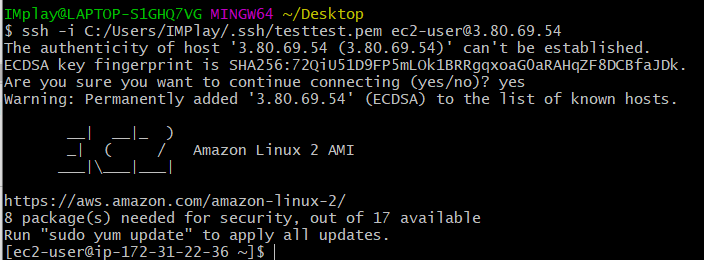